In [207]:
%matplotlib notebook

In [208]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

MARIJUANA_LEGALIZATION_YEAR = 2012

In [209]:
# Load in csv
crime_df = pd.read_csv("../Resources/incarceration_by_state.csv")
crime_df.head(10)

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0
6,COLORADO,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,NaN,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0
7,CONNECTICUT,True,2001,17507,False,False,3434602.0,11492.0,105.0,639.0,NaN,4183.0,6565.0,95299.0,17159.0,65762.0,12378.0
8,DELAWARE,True,2001,6841,False,False,796599.0,4868.0,23.0,420.0,NaN,1156.0,3269.0,27399.0,5144.0,19476.0,2779.0
9,FLORIDA,False,2001,72404,False,False,16373330.0,130713.0,874.0,6641.0,NaN,32867.0,90331.0,782517.0,176052.0,516548.0,89917.0


In [210]:
crime_df_colorado=crime_df[crime_df['jurisdiction']=='COLORADO']
crime_df_colorado.head(20)

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
6,COLORADO,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,NaN,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0
57,COLORADO,False,2002,18636,False,False,4501051.0,15882.0,179.0,2066.0,NaN,3579.0,10058.0,180054.0,31678.0,125193.0,23183.0
108,COLORADO,False,2003,19450,False,False,4547633.0,15757.0,185.0,1913.0,NaN,3738.0,9921.0,179706.0,32394.0,124496.0,22816.0
159,COLORADO,False,2004,19655,False,False,4601821.0,17121.0,201.0,1945.0,NaN,3739.0,11236.0,180322.0,33010.0,123308.0,24004.0
210,COLORADO,False,2005,21063,False,False,4663295.0,18498.0,173.0,2026.0,NaN,3948.0,12351.0,188449.0,34746.0,127602.0,26101.0
261,COLORADO,False,2006,22051,False,False,4753377.0,18794.0,171.0,2158.0,NaN,3824.0,12641.0,163439.0,32411.0,110372.0,20656.0
312,COLORADO,False,2007,22666,False,False,4861515.0,17101.0,155.0,2075.0,NaN,3461.0,11410.0,145808.0,28633.0,100519.0,16656.0
363,COLORADO,False,2008,23211,False,False,4939456.0,17480.0,165.0,2151.0,NaN,3404.0,11760.0,139340.0,28054.0,97937.0,13349.0
414,COLORADO,False,2009,22725,False,False,5024748.0,17022.0,159.0,2269.0,NaN,3371.0,11223.0,134196.0,26637.0,95079.0,12480.0
465,COLORADO,False,2010,22752,False,False,5047692.0,16339.0,129.0,2230.0,NaN,3164.0,10816.0,135001.0,26196.0,97534.0,11271.0


<IPython.core.display.Javascript object>


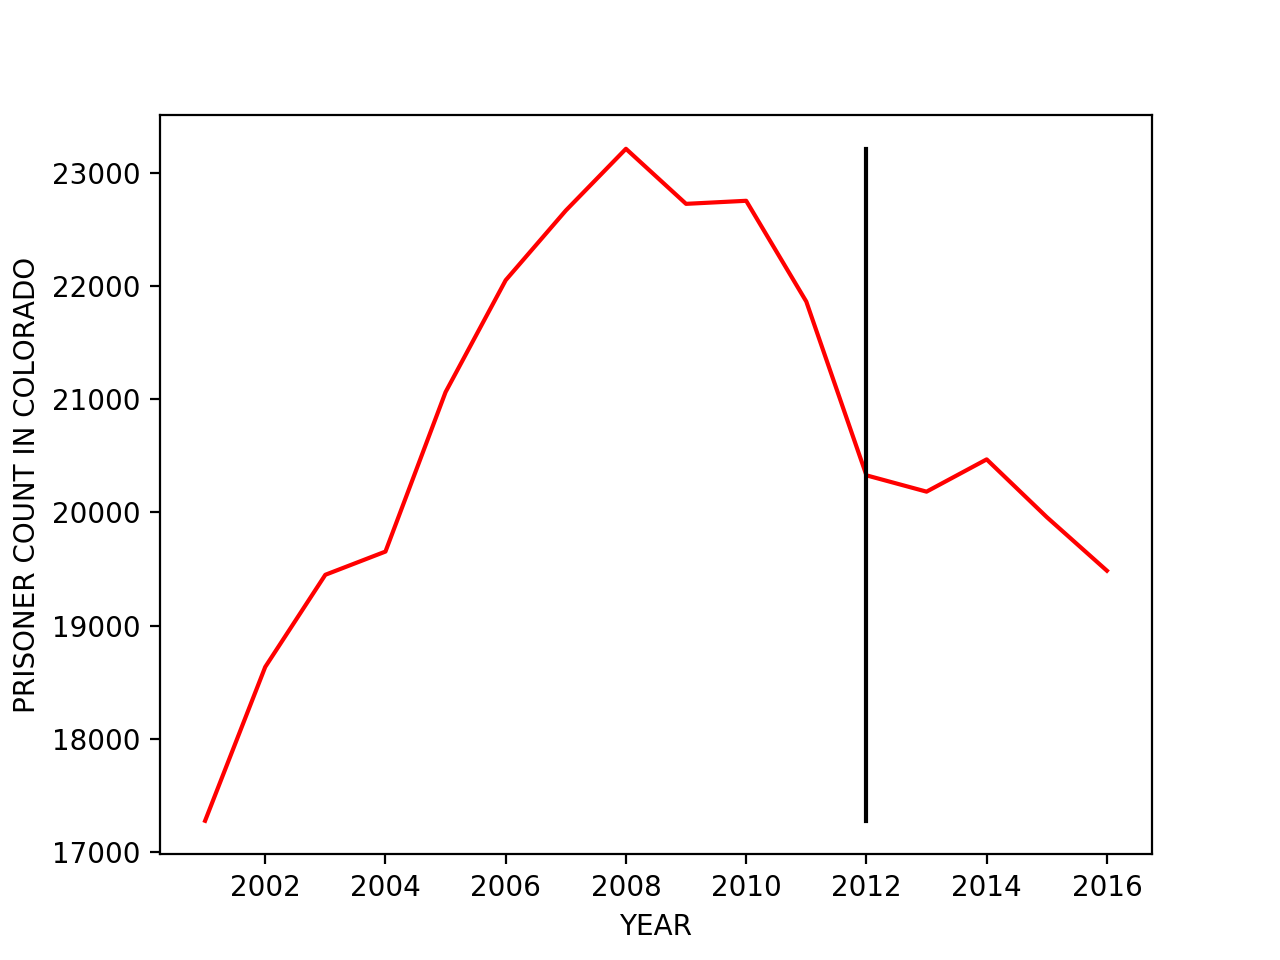

In [211]:
year = crime_df_colorado['year']
prisoner_count_colorado = crime_df_colorado['prisoner_count']
figure = plt.figure()

plt.plot(year, prisoner_count_colorado, 'r')
plt.plot([MARIJUANA_LEGALIZATION_YEAR, MARIJUANA_LEGALIZATION_YEAR], [min(prisoner_count_colorado), max(prisoner_count_colorado)], 'k-')
plt.xlabel('YEAR')
plt.ylabel('PRISONER COUNT IN COLORADO')

figure.savefig('Incarceration_by_year_Colorado.jpg')
plt.show()


<IPython.core.display.Javascript object>


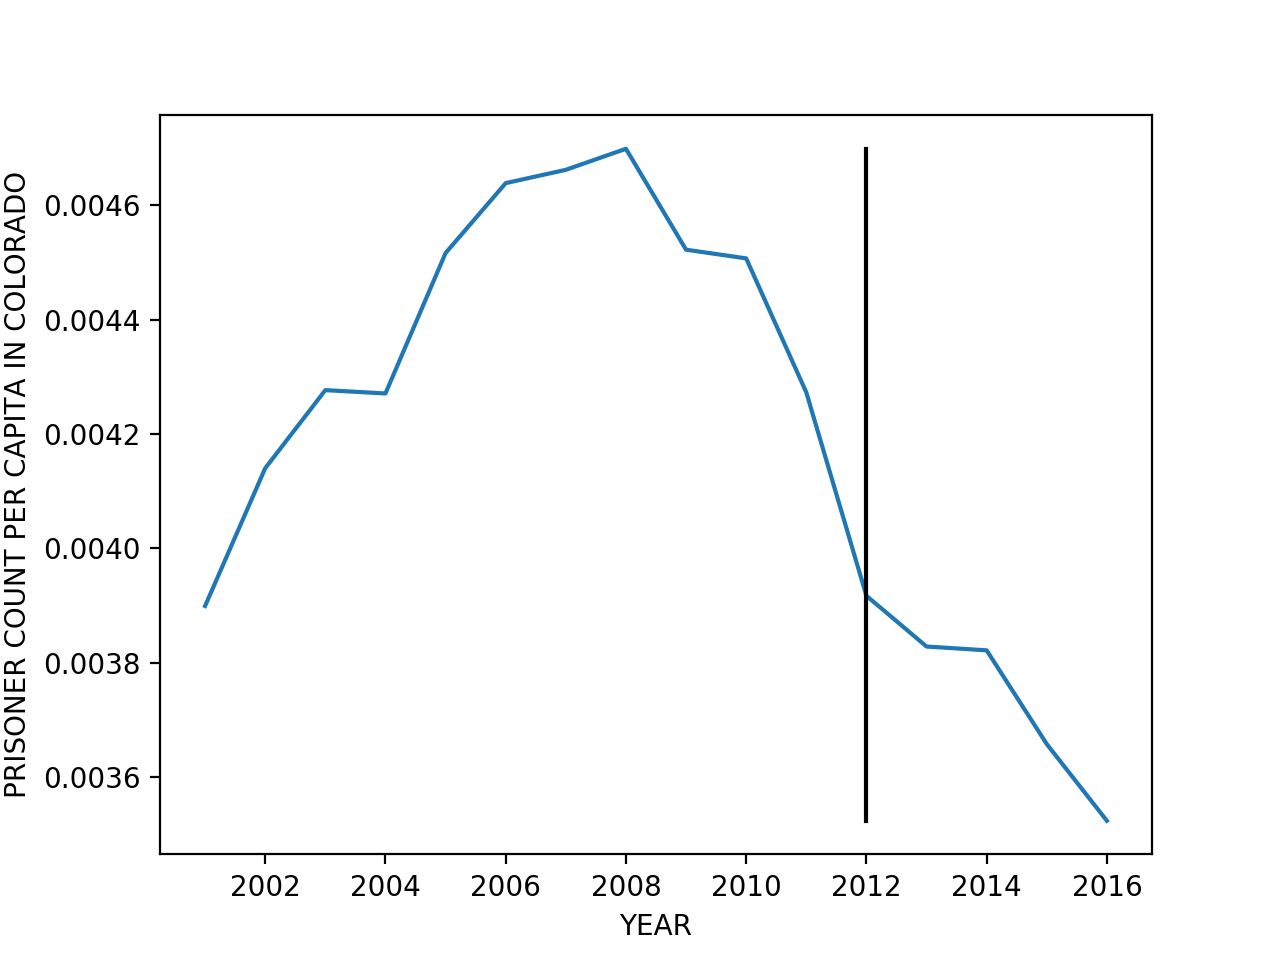

In [212]:
prisoner_per_capita_colorado = crime_df_colorado['prisoner_count']/crime_df_colorado['state_population']
figure = plt.figure()
plt.plot(year, prisoner_per_capita_colorado)
plt.plot([MARIJUANA_LEGALIZATION_YEAR, MARIJUANA_LEGALIZATION_YEAR], [min(prisoner_per_capita_colorado), max(prisoner_per_capita_colorado)], 'k-')
plt.xlabel('YEAR')
plt.ylabel('PRISONER COUNT PER CAPITA IN COLORADO')
figure.savefig('Incarceration_rate_by_year_Colorado.jpg')
plt.show()

In [213]:
crime_df_texas = crime_df[crime_df['jurisdiction']=='TEXAS']
crime_df_texas.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
43,TEXAS,False,2001,148480,False,False,21370983.0,122155.0,1332.0,8169.0,NaN,35348.0,77306.0,976654.0,204362.0,669625.0,102667.0
94,TEXAS,False,2002,152446,False,False,21736925.0,126018.0,1302.0,8508.0,NaN,37580.0,78628.0,1004274.0,212602.0,688992.0,102680.0
145,TEXAS,False,2003,153056,False,False,22103374.0,122246.0,1422.0,8025.0,NaN,37017.0,75782.0,1016735.0,219877.0,698644.0,98214.0
196,TEXAS,False,2004,156682,False,False,22471549.0,121554.0,1364.0,8388.0,NaN,35817.0,75985.0,1010702.0,220118.0,696507.0,94077.0
247,TEXAS,False,2005,157081,False,False,22928508.0,121091.0,1407.0,8511.0,NaN,35790.0,75383.0,990293.0,219828.0,677042.0,93423.0


<IPython.core.display.Javascript object>


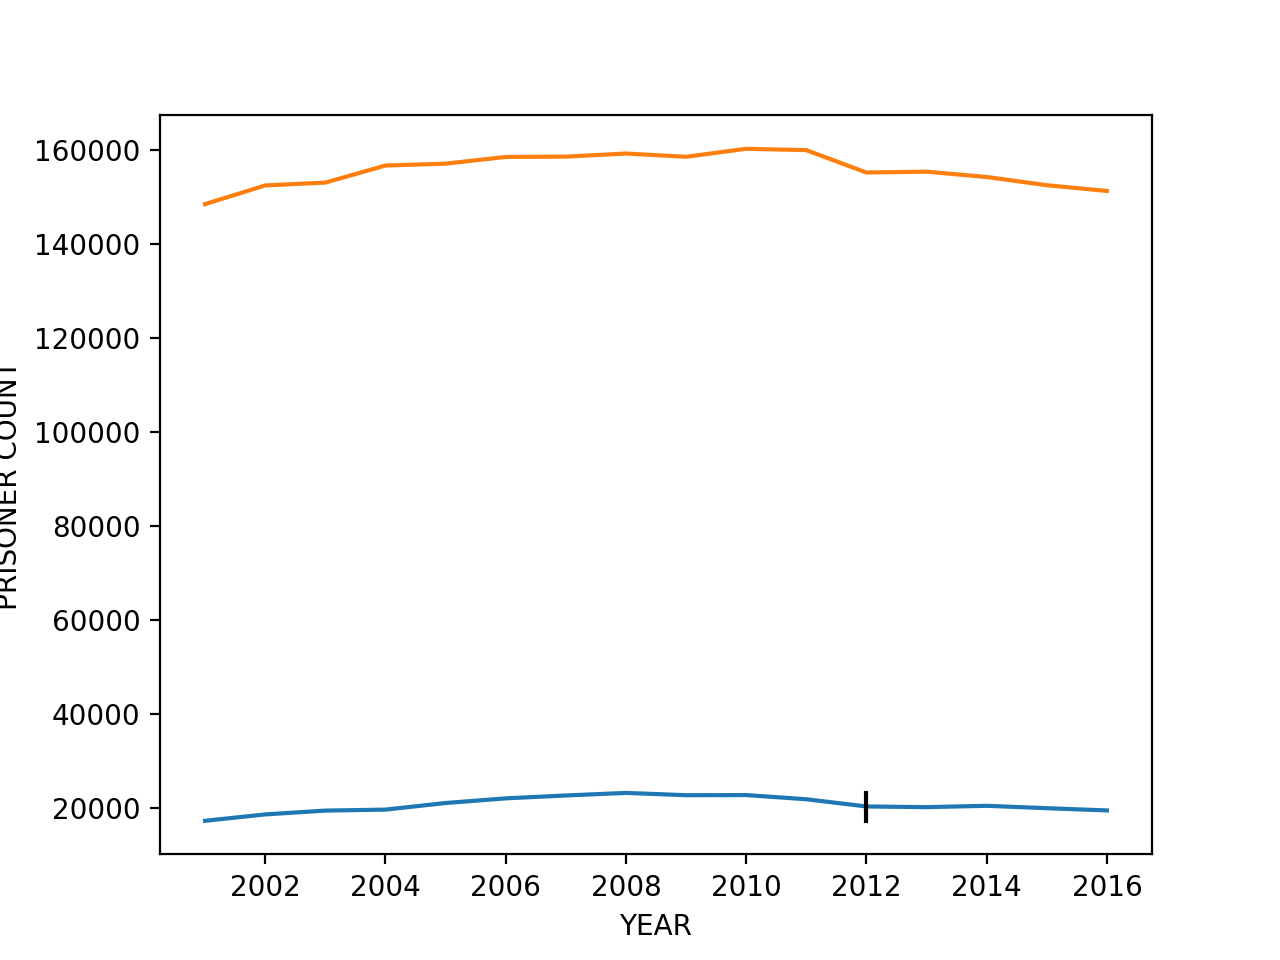

In [214]:
figure = plt.figure()
prisoner_count_texas = crime_df_texas['prisoner_count']
plt.plot('year', 'prisoner_count', data=crime_df_colorado, label='colorado')
plt.plot('year', 'prisoner_count', data=crime_df_texas, label='texas')
plt.plot([MARIJUANA_LEGALIZATION_YEAR, MARIJUANA_LEGALIZATION_YEAR], [min(prisoner_count_colorado), max(prisoner_count_colorado)], 'k-')
plt.xlabel('YEAR')
plt.ylabel('PRISONER COUNT')
figure.savefig('Incarceration_by_year_texas_colorado.jpg')
plt.show()

<IPython.core.display.Javascript object>


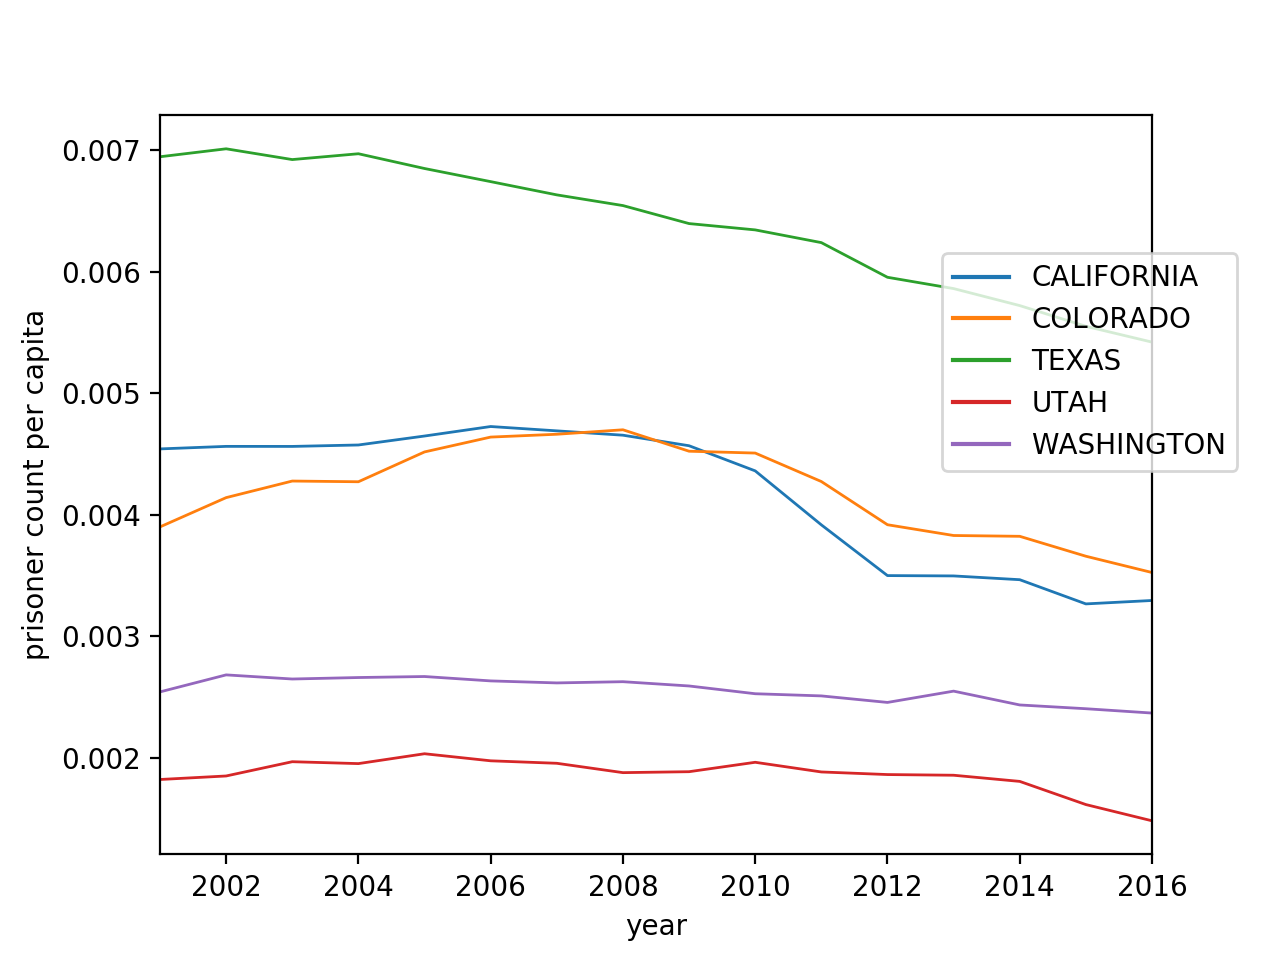

In [240]:
crime_df_ltd=crime_df[crime_df['jurisdiction'].isin([
    'TEXAS',
    'COLORADO',
    'CALIFORNIA',
    'WASHINGTON',
    'UTAH',
])]

#crime_df_ltd['crime_per_capita'] = crime_df_ltd.apply(lambda row: row.prisoner_count/row.state_population, axis=1)
fn = lambda row: row.prisoner_count/row.state_population # define a function for the new column
col = crime_df_ltd.apply(fn, axis=1) # get column data with an index
crime_df_ltd = crime_df_ltd.assign(crime_per_capita=col.values) 


#crime_df_ltd['crime_per_capita'] = crime_df_ltd['prisoner_count']/crime_df_ltd['state_population']
fig, ax = plt.subplots(1,1);
crime_df_ltd.groupby("jurisdiction").plot(x="year", y="crime_per_capita", ax=ax)

plt.legend([v[0] for v in crime_df_ltd.groupby('jurisdiction')['jurisdiction']], loc='lower right', bbox_to_anchor=(1.1, 0.5)) 
plt.xlabel('year')
plt.ylabel('prisoner count per capita')
fig.savefig('prisoner_count_per_capita_comparison.jpg')
for line in ax.lines:
    line.set_linewidth(1)